In [1]:
import sys
sys.path.append('..')

In [2]:
import torch
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import random
import torch.nn as nn
import torch.nn.functional as F

In [3]:
ligands = ["TNF", "R84", "PIC", "P3K", "FLA", "CpG", "FSL", "LPS", "UST"]
polarization = ["", "ib", "ig", "i0", "i3", "i4"]
replicas, size = 2, 1288 # replicated

In [4]:
from core.getdata import *
from core.dataset import *

<h3>Example of GetData</h3>

In [5]:
TNFib1 = GetData(ligands[0], polarization[1], replicas, size)
TNFib1.X.shape

(1288, 98)

<h3>Example of Dataset</h3>

In [6]:
data = Dataset(ligands, polarization, replicas, size)

In [7]:
%%time
for _ in data:
    pass

Wall time: 52 ms


In [8]:
data.data.shape

(69552, 98, 1)

In [9]:
print(type(data.data), type(data.labels))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [10]:
print(data.labels, data.labels.shape) #labels are multi-hot encoded

[0 0 0 ... 8 8 8] (69552,)


<h3>Initializing Dataloaders</h3>

In [11]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

In [12]:
X_len, test_len = int(len(data.data) * 0.9), int(len(data.data) * 0.1)
train_len, val_len = int(X_len * 0.9), int(X_len * 0.1)
print(X_len, test_len, train_len, val_len) #lengths
print(X_len + test_len, len(data.data))

62596 6955 56336 6259
69551 69552


In [13]:
training_data = data.data.reshape(data.data.shape[0], data.data.shape[1], 1) #adds extra dimension

In [14]:
data.data[1000].shape
len(data)

69552

In [15]:
dataset_X, dataset_val = torch.utils.data.random_split(data, [X_len, test_len + 1]) # need separate data and labels for LSTM?

In [16]:
dataloader_train = torch.utils.data.DataLoader(dataset_X, batch_size=64, shuffle=True)
dataloader_val = torch.utils.data.DataLoader(dataset_val, batch_size=64, shuffle=True)

In [17]:
print(len(dataloader_train), len(dataloader_val), len(dataloader_train) + len(dataloader_val))
###
#data[0:10]

979 109 1088


<h3>Model Training</h3>

In [18]:
from core.network import *
from core.trainer import *

In [19]:
torch.cuda.is_available()

True

In [20]:
#model parameters
input_size = 1
hidden_sizes = 98
output_size = 9

#training parameters
n_epochs = 80
batch_size = 64
learning_rate = 1e-3

In [21]:
model = LSTM(input_size, hidden_sizes, output_size, num_layers=3, device="cuda:0")
model.train()

LSTM(
  (lstm): LSTM(1, 98, num_layers=3, batch_first=True)
  (fc1): Linear(in_features=98, out_features=9, bias=True)
)

In [22]:
trainer = LSTMTrainer(model=model, device="cuda:0")

In [23]:
trainer.train(dataloader_train, dataloader_val, batch_size=batch_size, n_epochs=n_epochs)

  1%|█                                                                                  | 1/80 [00:13<17:12, 13.07s/it]

Epoch 001: | Training Loss: 2.137981275372413 | Validation Loss: 2.1376775623461524


  2%|██                                                                                 | 2/80 [00:25<16:37, 12.79s/it]

Epoch 002: | Training Loss: 2.1316624604645007 | Validation Loss: 2.114330801395101


  4%|███                                                                                | 3/80 [00:37<15:47, 12.30s/it]

Epoch 003: | Training Loss: 2.1156092102851516 | Validation Loss: 2.1379660597634973


  5%|████▏                                                                              | 4/80 [00:49<15:38, 12.35s/it]

Epoch 004: | Training Loss: 2.034863449336316 | Validation Loss: 2.000518196219698


  6%|█████▏                                                                             | 5/80 [01:02<15:36, 12.49s/it]

Epoch 005: | Training Loss: 1.9726508976368422 | Validation Loss: 1.9568751350455327


  8%|██████▏                                                                            | 6/80 [01:15<15:36, 12.65s/it]

Epoch 006: | Training Loss: 1.9005131658178063 | Validation Loss: 1.9059426062697664


  9%|███████▎                                                                           | 7/80 [01:27<15:05, 12.40s/it]

Epoch 007: | Training Loss: 1.7664855662600134 | Validation Loss: 1.7427662884423492


 10%|████████▎                                                                          | 8/80 [01:39<14:50, 12.36s/it]

Epoch 008: | Training Loss: 1.6938371543864794 | Validation Loss: 1.6941940423545487


 11%|█████████▎                                                                         | 9/80 [01:51<14:35, 12.33s/it]

Epoch 009: | Training Loss: 1.626440982896534 | Validation Loss: 1.6403941134794042


 12%|██████████▎                                                                       | 10/80 [02:04<14:28, 12.41s/it]

Epoch 010: | Training Loss: 1.5791329900383098 | Validation Loss: 1.5817513509627876


 14%|███████████▎                                                                      | 11/80 [02:16<14:05, 12.26s/it]

Epoch 011: | Training Loss: 1.542994454152981 | Validation Loss: 1.5550508444462348


 15%|████████████▎                                                                     | 12/80 [02:28<13:49, 12.19s/it]

Epoch 012: | Training Loss: 1.4974486163005887 | Validation Loss: 1.5571544148506375


 16%|█████████████▎                                                                    | 13/80 [02:41<13:44, 12.30s/it]

Epoch 013: | Training Loss: 1.4597612283933639 | Validation Loss: 1.4988154140087442


 18%|██████████████▎                                                                   | 14/80 [02:52<13:20, 12.13s/it]

Epoch 014: | Training Loss: 1.4162763321850225 | Validation Loss: 1.470110984023558


 19%|███████████████▍                                                                  | 15/80 [03:05<13:10, 12.17s/it]

Epoch 015: | Training Loss: 1.3892140641762847 | Validation Loss: 1.4298818100483046


 20%|████████████████▍                                                                 | 16/80 [03:16<12:49, 12.02s/it]

Epoch 016: | Training Loss: 1.3470697835224763 | Validation Loss: 1.3997592893215494


 21%|█████████████████▍                                                                | 17/80 [03:29<12:49, 12.21s/it]

Epoch 017: | Training Loss: 1.3160154136379114 | Validation Loss: 1.3675730786192308


 22%|██████████████████▍                                                               | 18/80 [03:41<12:30, 12.10s/it]

Epoch 018: | Training Loss: 1.287595292703611 | Validation Loss: 1.3771628885094178


 24%|███████████████████▍                                                              | 19/80 [03:53<12:22, 12.17s/it]

Epoch 019: | Training Loss: 1.2649261212781209 | Validation Loss: 1.324627858783127


 25%|████████████████████▌                                                             | 20/80 [04:05<12:00, 12.00s/it]

Epoch 020: | Training Loss: 1.236103116552725 | Validation Loss: 1.3269683428860586


 26%|█████████████████████▌                                                            | 21/80 [04:17<12:02, 12.24s/it]

Epoch 021: | Training Loss: 1.2104764037648552 | Validation Loss: 1.296075725227321


 28%|██████████████████████▌                                                           | 22/80 [04:30<11:56, 12.35s/it]

Epoch 022: | Training Loss: 1.1894672534317234 | Validation Loss: 1.293961243345103


 29%|███████████████████████▌                                                          | 23/80 [04:42<11:36, 12.21s/it]

Epoch 023: | Training Loss: 1.1738610059418644 | Validation Loss: 1.2480071684636107


 30%|████████████████████████▌                                                         | 24/80 [04:54<11:27, 12.28s/it]

Epoch 024: | Training Loss: 1.137900082582838 | Validation Loss: 1.2341560174565795


 31%|█████████████████████████▋                                                        | 25/80 [05:06<11:06, 12.12s/it]

Epoch 025: | Training Loss: 1.1163571236447734 | Validation Loss: 1.245919216116634


 32%|██████████████████████████▋                                                       | 26/80 [05:18<10:57, 12.17s/it]

Epoch 026: | Training Loss: 1.0903892342963915 | Validation Loss: 1.2312757646271941


 34%|███████████████████████████▋                                                      | 27/80 [05:30<10:39, 12.06s/it]

Epoch 027: | Training Loss: 1.085534945663076 | Validation Loss: 1.215960117655063


 35%|████████████████████████████▋                                                     | 28/80 [05:43<10:33, 12.18s/it]

Epoch 028: | Training Loss: 1.0459500169486142 | Validation Loss: 1.1883268777383578


 36%|█████████████████████████████▋                                                    | 29/80 [05:54<10:14, 12.06s/it]

Epoch 029: | Training Loss: 1.0242415578908404 | Validation Loss: 1.171917972214725


 38%|██████████████████████████████▊                                                   | 30/80 [06:07<10:09, 12.19s/it]

Epoch 030: | Training Loss: 1.0021312079098421 | Validation Loss: 1.1904375771863744


 39%|███████████████████████████████▊                                                  | 31/80 [06:19<09:50, 12.05s/it]

Epoch 031: | Training Loss: 0.9922272580027945 | Validation Loss: 1.1545163409425578


 40%|████████████████████████████████▊                                                 | 32/80 [06:31<09:41, 12.12s/it]

Epoch 032: | Training Loss: 0.9625249691954428 | Validation Loss: 1.1369805319593587


 41%|█████████████████████████████████▊                                                | 33/80 [06:44<09:36, 12.28s/it]

Epoch 033: | Training Loss: 0.9400881398564339 | Validation Loss: 1.1627954676610615


 42%|██████████████████████████████████▊                                               | 34/80 [06:57<09:38, 12.58s/it]

Epoch 034: | Training Loss: 0.9245537827523906 | Validation Loss: 1.1148808888339121


 44%|███████████████████████████████████▉                                              | 35/80 [07:09<09:19, 12.44s/it]

Epoch 035: | Training Loss: 0.8930140204643935 | Validation Loss: 1.1040461659431458


 45%|████████████████████████████████████▉                                             | 36/80 [07:22<09:15, 12.62s/it]

Epoch 036: | Training Loss: 0.8804894812686694 | Validation Loss: 1.0915121529080452


 46%|█████████████████████████████████████▉                                            | 37/80 [07:35<09:08, 12.75s/it]

Epoch 037: | Training Loss: 0.8713421407588534 | Validation Loss: 1.065158214590965


 48%|██████████████████████████████████████▉                                           | 38/80 [07:49<09:04, 12.97s/it]

Epoch 038: | Training Loss: 0.8403198337895877 | Validation Loss: 1.1159142922917638


 49%|███████████████████████████████████████▉                                          | 39/80 [08:02<08:57, 13.11s/it]

Epoch 039: | Training Loss: 0.8383818967714982 | Validation Loss: 1.0917479838799993


 50%|█████████████████████████████████████████                                         | 40/80 [08:15<08:45, 13.13s/it]

Epoch 040: | Training Loss: 0.8140834252729601 | Validation Loss: 1.036964259563236


 51%|██████████████████████████████████████████                                        | 41/80 [08:29<08:37, 13.28s/it]

Epoch 041: | Training Loss: 0.8064656250627827 | Validation Loss: 1.0541184364108864


 52%|███████████████████████████████████████████                                       | 42/80 [08:42<08:20, 13.17s/it]

Epoch 042: | Training Loss: 0.7800616517099832 | Validation Loss: 1.0646729370869628


 54%|████████████████████████████████████████████                                      | 43/80 [08:56<08:14, 13.37s/it]

Epoch 043: | Training Loss: 0.7595348156326516 | Validation Loss: 1.0481550070123935


 55%|█████████████████████████████████████████████                                     | 44/80 [09:10<08:11, 13.67s/it]

Epoch 044: | Training Loss: 0.761134024020722 | Validation Loss: 1.0088682278580623


 56%|██████████████████████████████████████████████▏                                   | 45/80 [09:23<07:48, 13.38s/it]

Epoch 045: | Training Loss: 0.7446780472050161 | Validation Loss: 1.000816040082809


 57%|███████████████████████████████████████████████▏                                  | 46/80 [09:36<07:30, 13.25s/it]

Epoch 046: | Training Loss: 0.7208692678331233 | Validation Loss: 1.0423917032163077


 59%|████████████████████████████████████████████████▏                                 | 47/80 [09:48<07:09, 13.02s/it]

Epoch 047: | Training Loss: 0.7130383433159574 | Validation Loss: 1.0100648567217205


 60%|█████████████████████████████████████████████████▏                                | 48/80 [10:01<06:55, 12.98s/it]

Epoch 048: | Training Loss: 0.7006685560582485 | Validation Loss: 1.0049515596223533


 61%|██████████████████████████████████████████████████▏                               | 49/80 [10:14<06:45, 13.09s/it]

Epoch 049: | Training Loss: 0.6800171158469612 | Validation Loss: 0.9938782817180004


 62%|███████████████████████████████████████████████████▎                              | 50/80 [10:27<06:32, 13.10s/it]

Epoch 050: | Training Loss: 0.672611374472695 | Validation Loss: 0.969345711239981


 64%|████████████████████████████████████████████████████▎                             | 51/80 [10:40<06:14, 12.92s/it]

Epoch 051: | Training Loss: 0.6555986567890315 | Validation Loss: 0.9517620916760295


 65%|█████████████████████████████████████████████████████▎                            | 52/80 [10:54<06:07, 13.13s/it]

Epoch 052: | Training Loss: 0.6564663304310897 | Validation Loss: 1.0016315021646132


 66%|██████████████████████████████████████████████████████▎                           | 53/80 [11:07<05:56, 13.21s/it]

Epoch 053: | Training Loss: 0.6416533909304271 | Validation Loss: 0.9349710099194029


 68%|███████████████████████████████████████████████████████▎                          | 54/80 [11:20<05:43, 13.21s/it]

Epoch 054: | Training Loss: 0.6172333244801298 | Validation Loss: 0.9733553053042211


 69%|████████████████████████████████████████████████████████▍                         | 55/80 [11:34<05:35, 13.41s/it]

Epoch 055: | Training Loss: 0.6316892633460028 | Validation Loss: 0.9311829542894976


 70%|█████████████████████████████████████████████████████████▍                        | 56/80 [11:48<05:25, 13.56s/it]

Epoch 056: | Training Loss: 0.6073690550106904 | Validation Loss: 0.9471238222690898


 71%|██████████████████████████████████████████████████████████▍                       | 57/80 [12:01<05:11, 13.54s/it]

Epoch 057: | Training Loss: 0.588411793706366 | Validation Loss: 0.9305175646729426


 72%|███████████████████████████████████████████████████████████▍                      | 58/80 [12:15<04:56, 13.46s/it]

Epoch 058: | Training Loss: 0.595418600690864 | Validation Loss: 0.96054570117128


 74%|████████████████████████████████████████████████████████████▍                     | 59/80 [12:29<04:46, 13.66s/it]

Epoch 059: | Training Loss: 0.5767209939011758 | Validation Loss: 0.9161772000680276


 75%|█████████████████████████████████████████████████████████████▌                    | 60/80 [12:44<04:39, 14.00s/it]

Epoch 060: | Training Loss: 0.5597483463227688 | Validation Loss: 0.9361150822508226


 76%|██████████████████████████████████████████████████████████████▌                   | 61/80 [12:57<04:25, 13.96s/it]

Epoch 061: | Training Loss: 0.5428009335516711 | Validation Loss: 0.9238379936699473


 78%|███████████████████████████████████████████████████████████████▌                  | 62/80 [13:11<04:09, 13.86s/it]

Epoch 062: | Training Loss: 0.5473382338592298 | Validation Loss: 0.9445214974224021


 79%|████████████████████████████████████████████████████████████████▌                 | 63/80 [13:24<03:53, 13.71s/it]

Epoch 063: | Training Loss: 0.5367257781897551 | Validation Loss: 0.896397805815443


 80%|█████████████████████████████████████████████████████████████████▌                | 64/80 [13:37<03:35, 13.50s/it]

Epoch 064: | Training Loss: 0.533671447826479 | Validation Loss: 0.9205734997714331


 81%|██████████████████████████████████████████████████████████████████▋               | 65/80 [13:51<03:23, 13.54s/it]

Epoch 065: | Training Loss: 0.5145142881905582 | Validation Loss: 0.8977468213356963


 82%|███████████████████████████████████████████████████████████████████▋              | 66/80 [14:05<03:09, 13.52s/it]

Epoch 066: | Training Loss: 0.5205699530514803 | Validation Loss: 0.9101098516118635


 84%|████████████████████████████████████████████████████████████████████▋             | 67/80 [14:18<02:56, 13.55s/it]

Epoch 067: | Training Loss: 0.49702407879349647 | Validation Loss: 0.9272894071876456


 85%|█████████████████████████████████████████████████████████████████████▋            | 68/80 [14:31<02:41, 13.44s/it]

Epoch 068: | Training Loss: 0.5130071218246337 | Validation Loss: 0.8832046564565886


 86%|██████████████████████████████████████████████████████████████████████▋           | 69/80 [14:45<02:28, 13.53s/it]

Epoch 069: | Training Loss: 0.47063398901544384 | Validation Loss: 0.9075720545348771


 88%|███████████████████████████████████████████████████████████████████████▊          | 70/80 [14:59<02:16, 13.64s/it]

Epoch 070: | Training Loss: 0.4866573035534361 | Validation Loss: 0.8750915305876951


 89%|████████████████████████████████████████████████████████████████████████▊         | 71/80 [15:13<02:04, 13.81s/it]

Epoch 071: | Training Loss: 0.5031582923935188 | Validation Loss: 0.9184458665891525


 90%|█████████████████████████████████████████████████████████████████████████▊        | 72/80 [15:26<01:49, 13.65s/it]

Epoch 072: | Training Loss: 0.47302921394607295 | Validation Loss: 0.8832145694198958


 91%|██████████████████████████████████████████████████████████████████████████▊       | 73/80 [15:40<01:36, 13.73s/it]

Epoch 073: | Training Loss: 0.44545307586519417 | Validation Loss: 0.8674849290913398


 92%|███████████████████████████████████████████████████████████████████████████▊      | 74/80 [15:54<01:21, 13.65s/it]

Epoch 074: | Training Loss: 0.4672027954772739 | Validation Loss: 0.8872610800856844


 94%|████████████████████████████████████████████████████████████████████████████▉     | 75/80 [16:07<01:06, 13.37s/it]

Epoch 075: | Training Loss: 0.4714372101429169 | Validation Loss: 0.8832360784941857


 95%|█████████████████████████████████████████████████████████████████████████████▉    | 76/80 [16:20<00:53, 13.36s/it]

Epoch 076: | Training Loss: 0.475553199207454 | Validation Loss: 0.9454692120945781


 96%|██████████████████████████████████████████████████████████████████████████████▉   | 77/80 [16:34<00:40, 13.49s/it]

Epoch 077: | Training Loss: 0.4338992653115899 | Validation Loss: 1.0463454143716655


 98%|███████████████████████████████████████████████████████████████████████████████▉  | 78/80 [16:47<00:26, 13.37s/it]

Epoch 078: | Training Loss: 0.4321245495857817 | Validation Loss: 0.8382710223897881


 99%|████████████████████████████████████████████████████████████████████████████████▉ | 79/80 [17:00<00:13, 13.45s/it]

Epoch 079: | Training Loss: 0.4184550117145733 | Validation Loss: 0.9322148916918204


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [17:13<00:00, 12.92s/it]

Epoch 080: | Training Loss: 0.42122726727836407 | Validation Loss: 0.860159052621334


<h3>Evaluation</h3>

In [24]:
torch.cuda.empty_cache()
x_batch, y_batch = dataset_val[0:10000]
# to do : convert x_batch to tensor and send to gpu 
x_batch = torch.tensor(x_batch, device=torch.device("cuda:0"))
y_pred = trainer.model(x_batch)
y_pred = F.softmax(y_pred, dim=1)
# to do : convert to np array and vstack it to y_pred
y_pred = y_pred.detach().cpu().numpy()
y_pred = np.argmax(y_pred, axis=1)
dic = {"y_pred": y_pred, "y_true": y_batch}

df = pd.DataFrame(dic)

In [25]:
df

,y_pred,y_true
0,1,1
1,2,2
2,1,1
3,6,4
4,7,7
...,...,...
6951,2,2
6952,6,3
6953,0,0
6954,0,0


In [26]:
print(f' Accuracy: {sum(df["y_pred"] == df["y_true"])/6956}')

 Accuracy: 0.7626509488211616


In [28]:
import pickle
import os
torch.save(model.state_dict(), '../models/lstm1.pth') # model trained on replicated dataset

<h3>Plots</h3>

In [29]:
import matplotlib.pyplot as plt

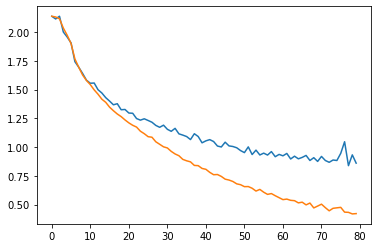

In [30]:
plt.plot(trainer.val_losses)
plt.plot(trainer.train_losses)

Overfitting seems to occur ~50 epochs